In [1]:
import os 

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
# years = range(2005, 2015) # all years from 2005-2014 (10 year span)
# directory_path = '/projects/lortizur/cop_climate/era5/' # for original data files

# # create list of file names from directory by checking for year within range defined above
# # file name looks like: 'directory_path+download_daily_maximum_2m_temperature_2005_01.nc'
# # each file contains data from each day during that month within that year
# files_list = [directory_path+f for f in os.listdir(directory_path) if int(f[-10:-6]) in years]

# # open list of files as single dataset 
# ds = xr.open_mfdataset(files_list)

# # convert K to ºC
# ds['t2m'] = (ds['t2m'] - 273.15).assign_attrs(units='degC')

# # group data by month, calculate mean per month
# ds_month_mean = ds.groupby('time.month').mean()

# # save file with grouped mean calculation to disk to improve performance
# ds_month_mean.to_netcdf('/home/alawyer2/era5-data/monthly-means.nc')

# access local mean file, save to variable
local_mean_file = xr.open_dataset('/home/alawyer2/era5-data/monthly-means.nc')

Text(0.5, 0.95, 'Average monthly temperature (ºC at 2m)')

<Figure size 1100x850 with 0 Axes>

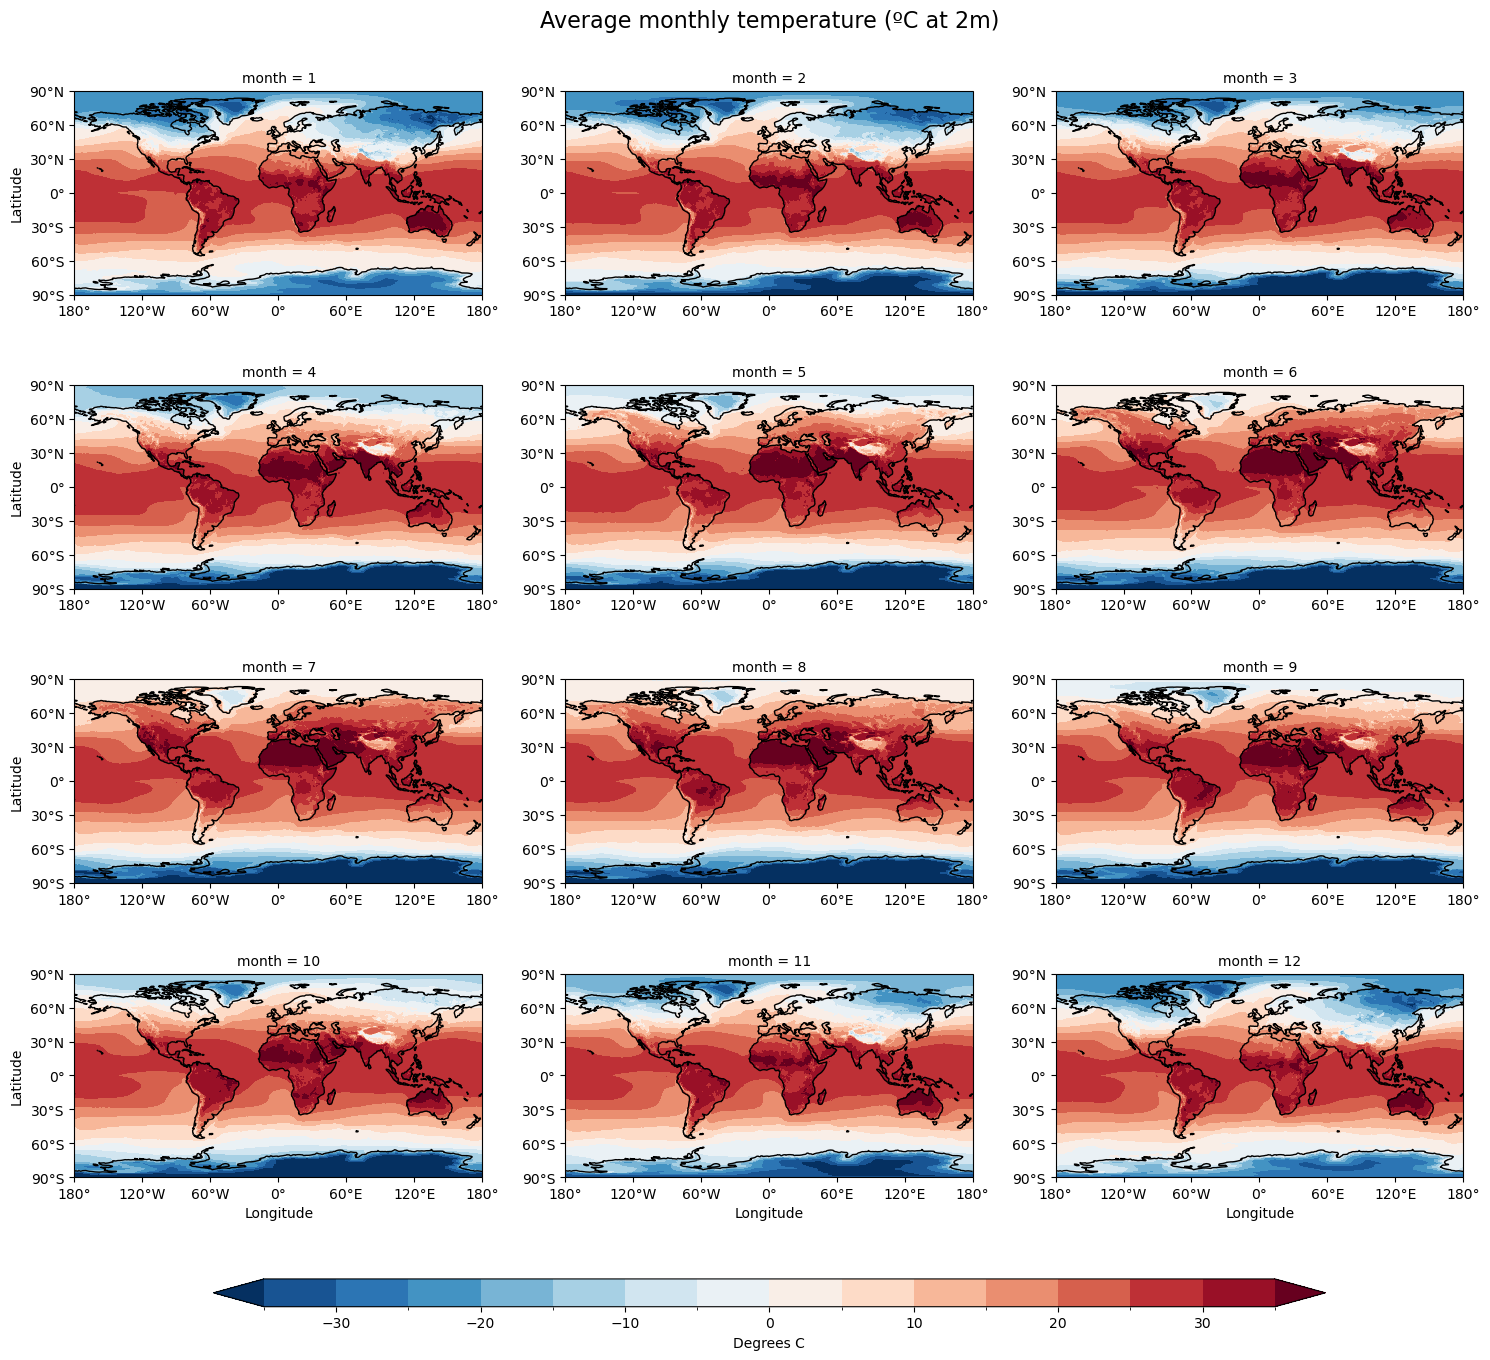

In [61]:
fig = plt.figure(figsize=(11, 8.5))

# set levels for countours and colorbar
clevs = np.arange(-35, 36, 5)

# Create facet grid for each month
fg = local_mean_file['t2m'].plot.contourf(
    levels=clevs,
    row='month',
    col_wrap=3,
    aspect=1.1,
    size=4,
    robust=True,
    cmap='RdBu_r',
    extend='both',
    subplot_kws={"projection": ccrs.PlateCarree()},
    cbar_kwargs={
        "location": "bottom",
        "shrink": 0.8,
        "aspect": 40,
        "label": "Degrees C",
    },
)

# Set labels at bottom of columns and left side of rows
fg.set_xlabels('Longitude')
fg.set_ylabels('Latitude')

plt.subplots_adjust(wspace=0.2, bottom=0.22)

for ax in fg.axs.flat:
    ax.coastlines()

    # Longitude labels
    ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_xlim(right=181) # right-most 180º tick mark wasn't showing up without this line

    # Latitude labels
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

# add and position chart title
plt.suptitle('Average monthly temperature (ºC at 2m)', fontsize=16, y=0.95)